<a href="https://colab.research.google.com/github/YogeshwarranSK/Coursera/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

DATA COLLECTION

In [54]:
gold_dataset = pd.read_csv('/gld_price_data.csv')

DATA COLLECTION AND PROCESSING

In [55]:
gold_dataset.shape

(2290, 6)

In [56]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [57]:
# to find out missing values
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [58]:
gold_dataset.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

In [59]:
#statistical measures of the dataset
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [60]:
correlation = gold_dataset.corr()

<ipython-input-60-a17bf32cf03a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

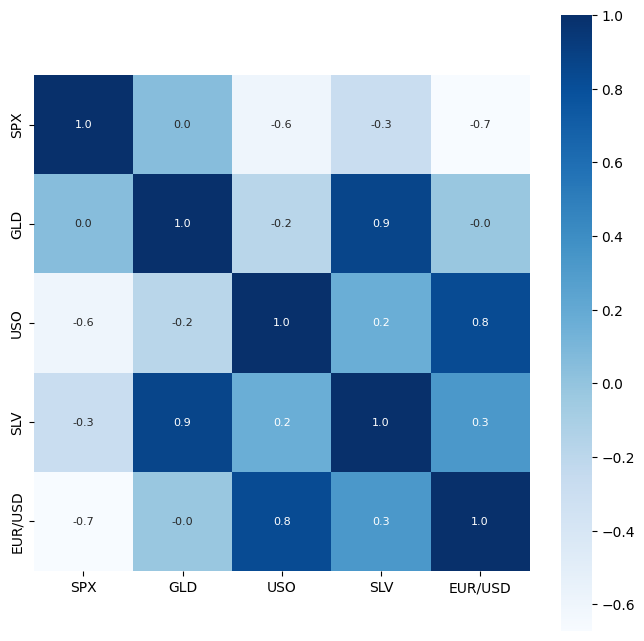

In [61]:
plot = plt.figure(figsize = (8,8))
sns.heatmap(correlation ,cbar = 'True',square = 'True',fmt ='.1f',annot = True,annot_kws={'size':8},cmap = 'Blues')

In [62]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


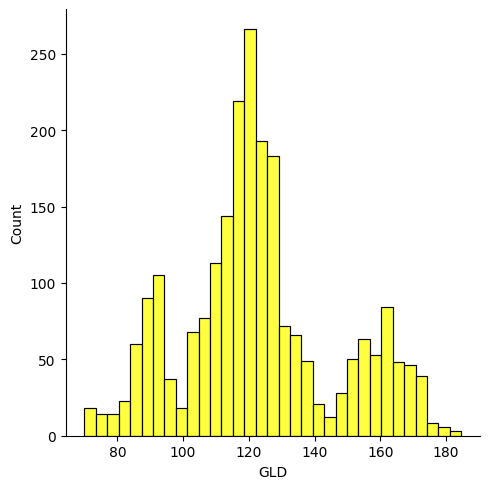

In [63]:
#to check the distribution of GLD
sns.displot(gold_dataset['GLD'],color = 'yellow')

SPLITTING FEATURES AND TARGET

In [64]:
X = gold_dataset.drop(['Date','GLD'],axis=1)
Y = gold_dataset['GLD']

In [65]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [66]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


TRAINING AND TESTING DATA

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [68]:
# model training
regressor = RandomForestRegressor(n_estimators=100)

In [69]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [70]:
#model evalutaion
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.55999923  81.64359997 116.0644002  127.7039007  120.8239015
 154.60629711 150.20159815 126.18170044 117.4915987  125.99960059
 116.63640093 171.61370072 141.62149877 167.78479854 115.04810014
 117.69840038 139.9821033  170.28430122 159.70900322 155.9324991
 155.12499992 125.13659995 176.17919972 157.70840181 125.3646005
  93.67899945  77.20720016 120.91450008 119.08739929 167.49519942
  88.13250052 125.24529997  91.26450071 117.7153002  121.05439912
 136.40290058 115.56260106 114.68550088 147.92809954 107.34840113
 104.42930233  87.0984978  126.61780087 117.91689991 152.77329943
 119.64699977 108.29349989 108.35549803  93.22590022 127.18149795
  75.15290011 113.6427992  121.26240021 111.29879933 118.93219883
 120.70419914 158.91499962 168.51460083 147.21759673  85.72439849
  94.49130034  86.79909882  90.45880026 119.04400064 126.47970056
 127.48180009 169.42290019 122.18229949 117.33779857  98.55250043
 168.18619973 143.0170983  132.25210257 121.22090202 121.70769931
 119.63200044

In [71]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)

In [72]:
print("R Squared Mean :",error_score)

R Squared Mean : 0.9883937866426225


In [73]:
Y_test = list(Y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

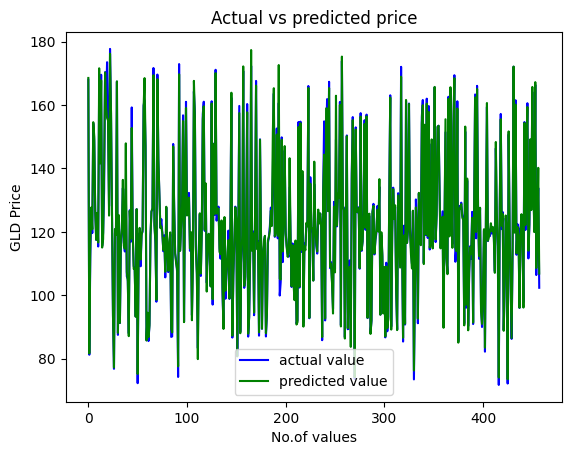

In [74]:
# To compare Actual vs Predicated Values in Plot
plt.plot (Y_test, color = 'blue', label ='actual value')
plt.plot (test_data_prediction, color = 'green', label ='predicted value')
plt.title('Actual vs predicted price')
plt.xlabel('No.of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show